In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 250})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px
import ast

In [2]:
data = pd.read_csv('FINAL_ARXIV_2025_with_affiliations.csv')

In [3]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,keywords,date,comments,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"['Galaxies (573)', 'Astronomy image processing...",2025-01-01,"Submitted to AAS Journals. 10 pages, 4 figures...","ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,['powered by accretion of matter from a compan...,2025-01-01,"19 pages, 12 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,[],2025-01-01,Accepted for publication in IEEE Transactions ...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01,Proceeding presented at the 8th Heidelberg Int...,NaN,0,NaN,0.0,0.0,0,0
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,['galaxies: rotation curve - galaxies: fundame...,2025-01-01,"19 pages, 12 figures, ApJ accepted",NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,[],2025-12-22,NaN,NaN,0,NaN,0.0,0.0,0,0
18332,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,...,['Active galactic nuclei (16) - Light curves (...,2025-12-22,"16 pages, 13 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1
18333,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,['cosmological parameters from LSS – power spe...,2025-12-22,"42 pages, 17 figures, 11 tables. Comments are ...",NaN,0,NaN,0.0,0.0,0,0
18334,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,...,['Sun:corona – Sun:magnetic fields 1 INTRODUCT...,2025-12-22,"18 pages, 18 figures",NaN,0,"Breu, C. A.: School of Mathematics and Statist...",0.0,0.0,0,0


In [4]:
# Month Column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [5]:
print(data['submitted_journal'].unique())

['AAS Journals' nan
 'IEEE Transactions on Applied Superconductivity for ASC2024 special issue'
 'appear in the Proceedings of the 17th Marcel Grossmann Meeting (MG17)/Pescara'
 'ApJ' 'A&A' 'Monthly Notices of the Royal Astronomical Society (MNRAS)'
 'Astronomy & Astrophysics' 'PASP' 'MNRAS'
 'Astronomy & Astrophysics (A&A)' 'ApJL' 'AJ Jan 23 2025'
 'the Open Journal of Astrophysics'
 'Astronomy & Astrophysics on 20 January' 'MNRAS (23 January 2025)'
 'ApJ January 22' 'the Journal of High Energy Astrophysics' 'PRD' 'JHEAP'
 'the Astrophysical Bulletin journal' 'AJ' 'Astronomy and Astrophysics'
 'the Astrophysical Journal' 'Astronomy and Astrophysics Letters'
 'Astronomy & Astrophysics (16 pages' 'Astronomy & Astrophysics (18 pages'
 'JOSS' 'PASA' 'MRNAS' 'EPJ Web Conf' 'ApJS' 'The Astrophysical Journal'
 'Astronomical Data Analysis Software and Systems (ADASS) XXXIV 2024'
 'Research Notes of the AAS' 'Astronomy and Astrophysics (A&A)'
 'MNRAS in this form'
 'ApJ- this is the revised ve

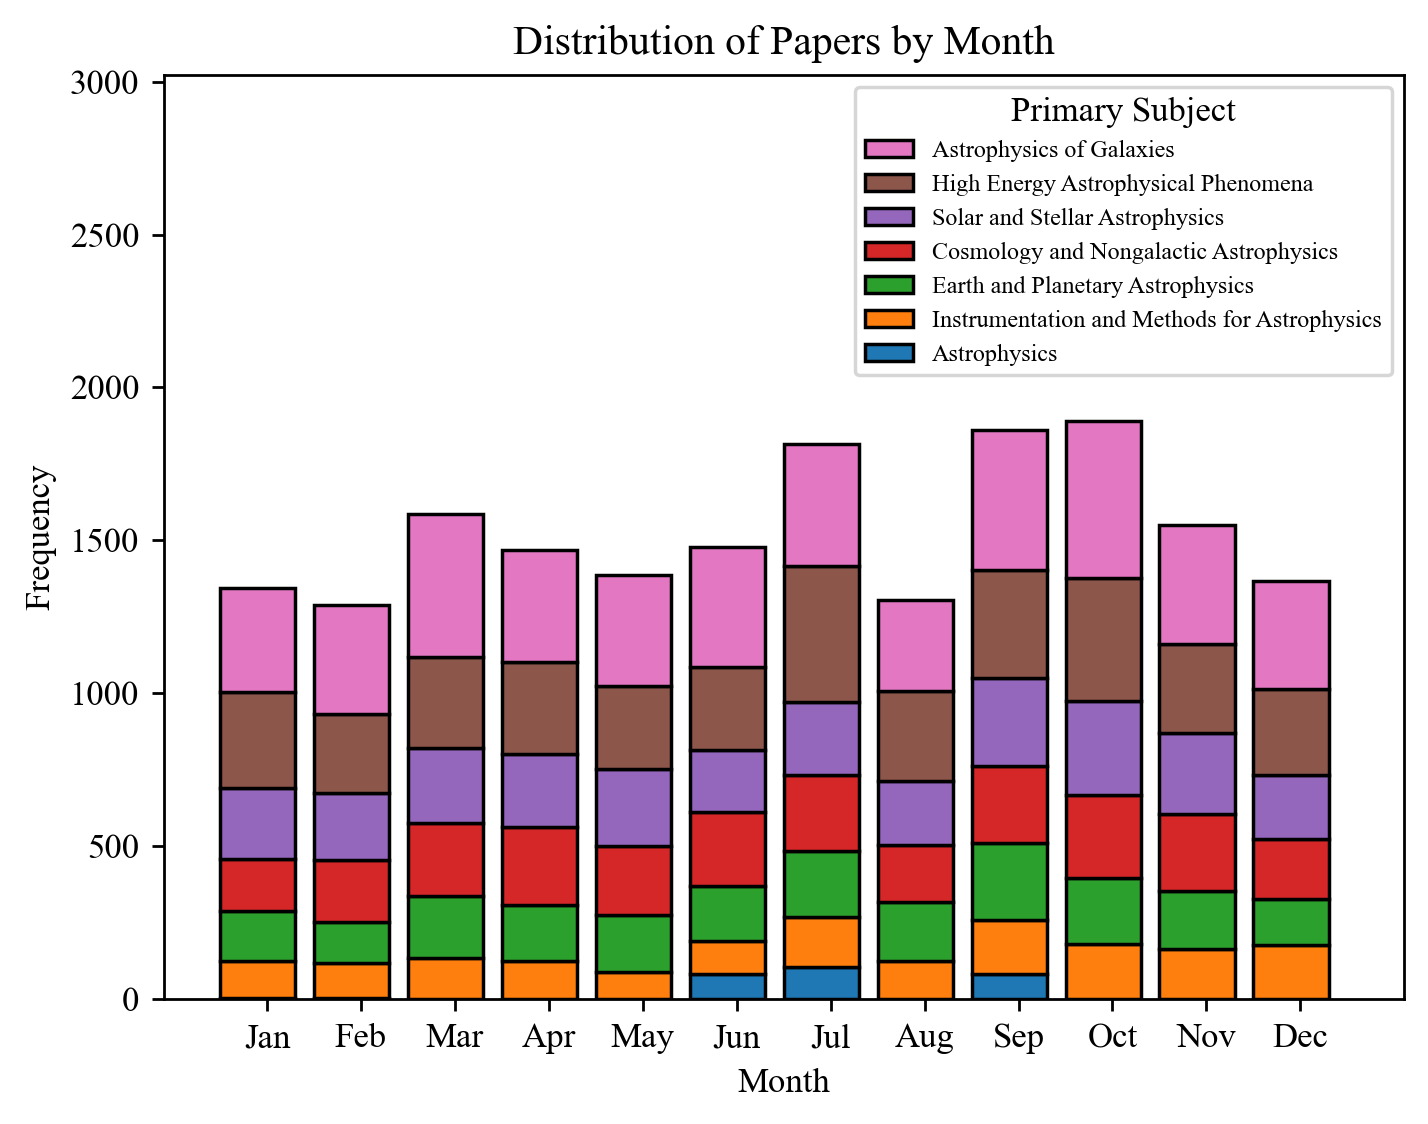

In [6]:
subjects = data['primary_subject'].unique()

# Calculate total counts to sort
subject_counts = data['primary_subject'].value_counts()
# Sort subjects by count (ascending for largest at top in standard stack, or descending)
sorted_subjects = subject_counts.sort_values(ascending=True).index.tolist()

data_by_subject = [data[data['primary_subject'] == s]['month'] for s in sorted_subjects]

bins = np.arange(0.5, 13.5, 1)
plt.hist(data_by_subject, bins=bins, stacked=True, edgecolor='black', label=sorted_subjects, width=0.8)
plt.title('Distribution of Papers by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Increase y-axis limit to make room for the legend
plt.ylim(0, data['month'].value_counts().max() * 1.6)

# Reverse legend to match visual stack order (top to bottom)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Primary Subject', loc='upper right', fontsize='x-small')
plt.show()

In [32]:
# Secondary Subject Statistics
# Print Unique Secondary Subjects
# Clean and split the secondary subjects
# The column contains string representations of lists, so we need to parse them

# Function to parse the stringified lists
def parse_subjects(subject_str):
    try:
        return ast.literal_eval(subject_str)
    except (ValueError, SyntaxError):
        return []

# Apply parsing and explode the list to get individual subjects
all_secondary_subjects = data['secondary_subjects'].dropna().apply(parse_subjects).explode()
unique_secondary_subjects = all_secondary_subjects.unique()

print("Unique Secondary Subjects (Individual):")
for subject in unique_secondary_subjects:
    print(subject)


# Count occurrences of each secondary subject in descending order
secondary_subject_counts = all_secondary_subjects.value_counts()
print("\nSecondary Subjects Ranked by Number of Papers:")
for subject, count in secondary_subject_counts.items():
    print(f"{subject}: {count} papers")

Unique Secondary Subjects (Individual):
Machine Learning
Instrumentation and Methods for Astrophysics
Cosmology and Nongalactic Astrophysics
Solar and Stellar Astrophysics
Physics and Society
High Energy Astrophysical Phenomena
Earth and Planetary Astrophysics
High Energy Physics - Phenomenology
General Relativity and Quantum Cosmology
High Energy Physics - Theory
Nuclear Theory
Instrumentation and Detectors
Digital Libraries
Strongly Correlated Electrons
Computational Physics
Astrophysics of Galaxies
High Energy Physics - Experiment
Plasma Physics
Space Physics
Chaotic Dynamics
Physics Education
Atomic Physics
Materials Science
Statistical Mechanics
Fluid Dynamics
Classical Physics
Data Analysis, Statistics and Probability
Systems and Control
Optimization and Control
Robotics
nan
Nuclear Experiment
Artificial Intelligence
Quantum Physics
Geophysics
Mathematical Physics
Algebraic Geometry
Soft Condensed Matter
Computer Vision and Pattern Recognition
Image and Video Processing
Applicati

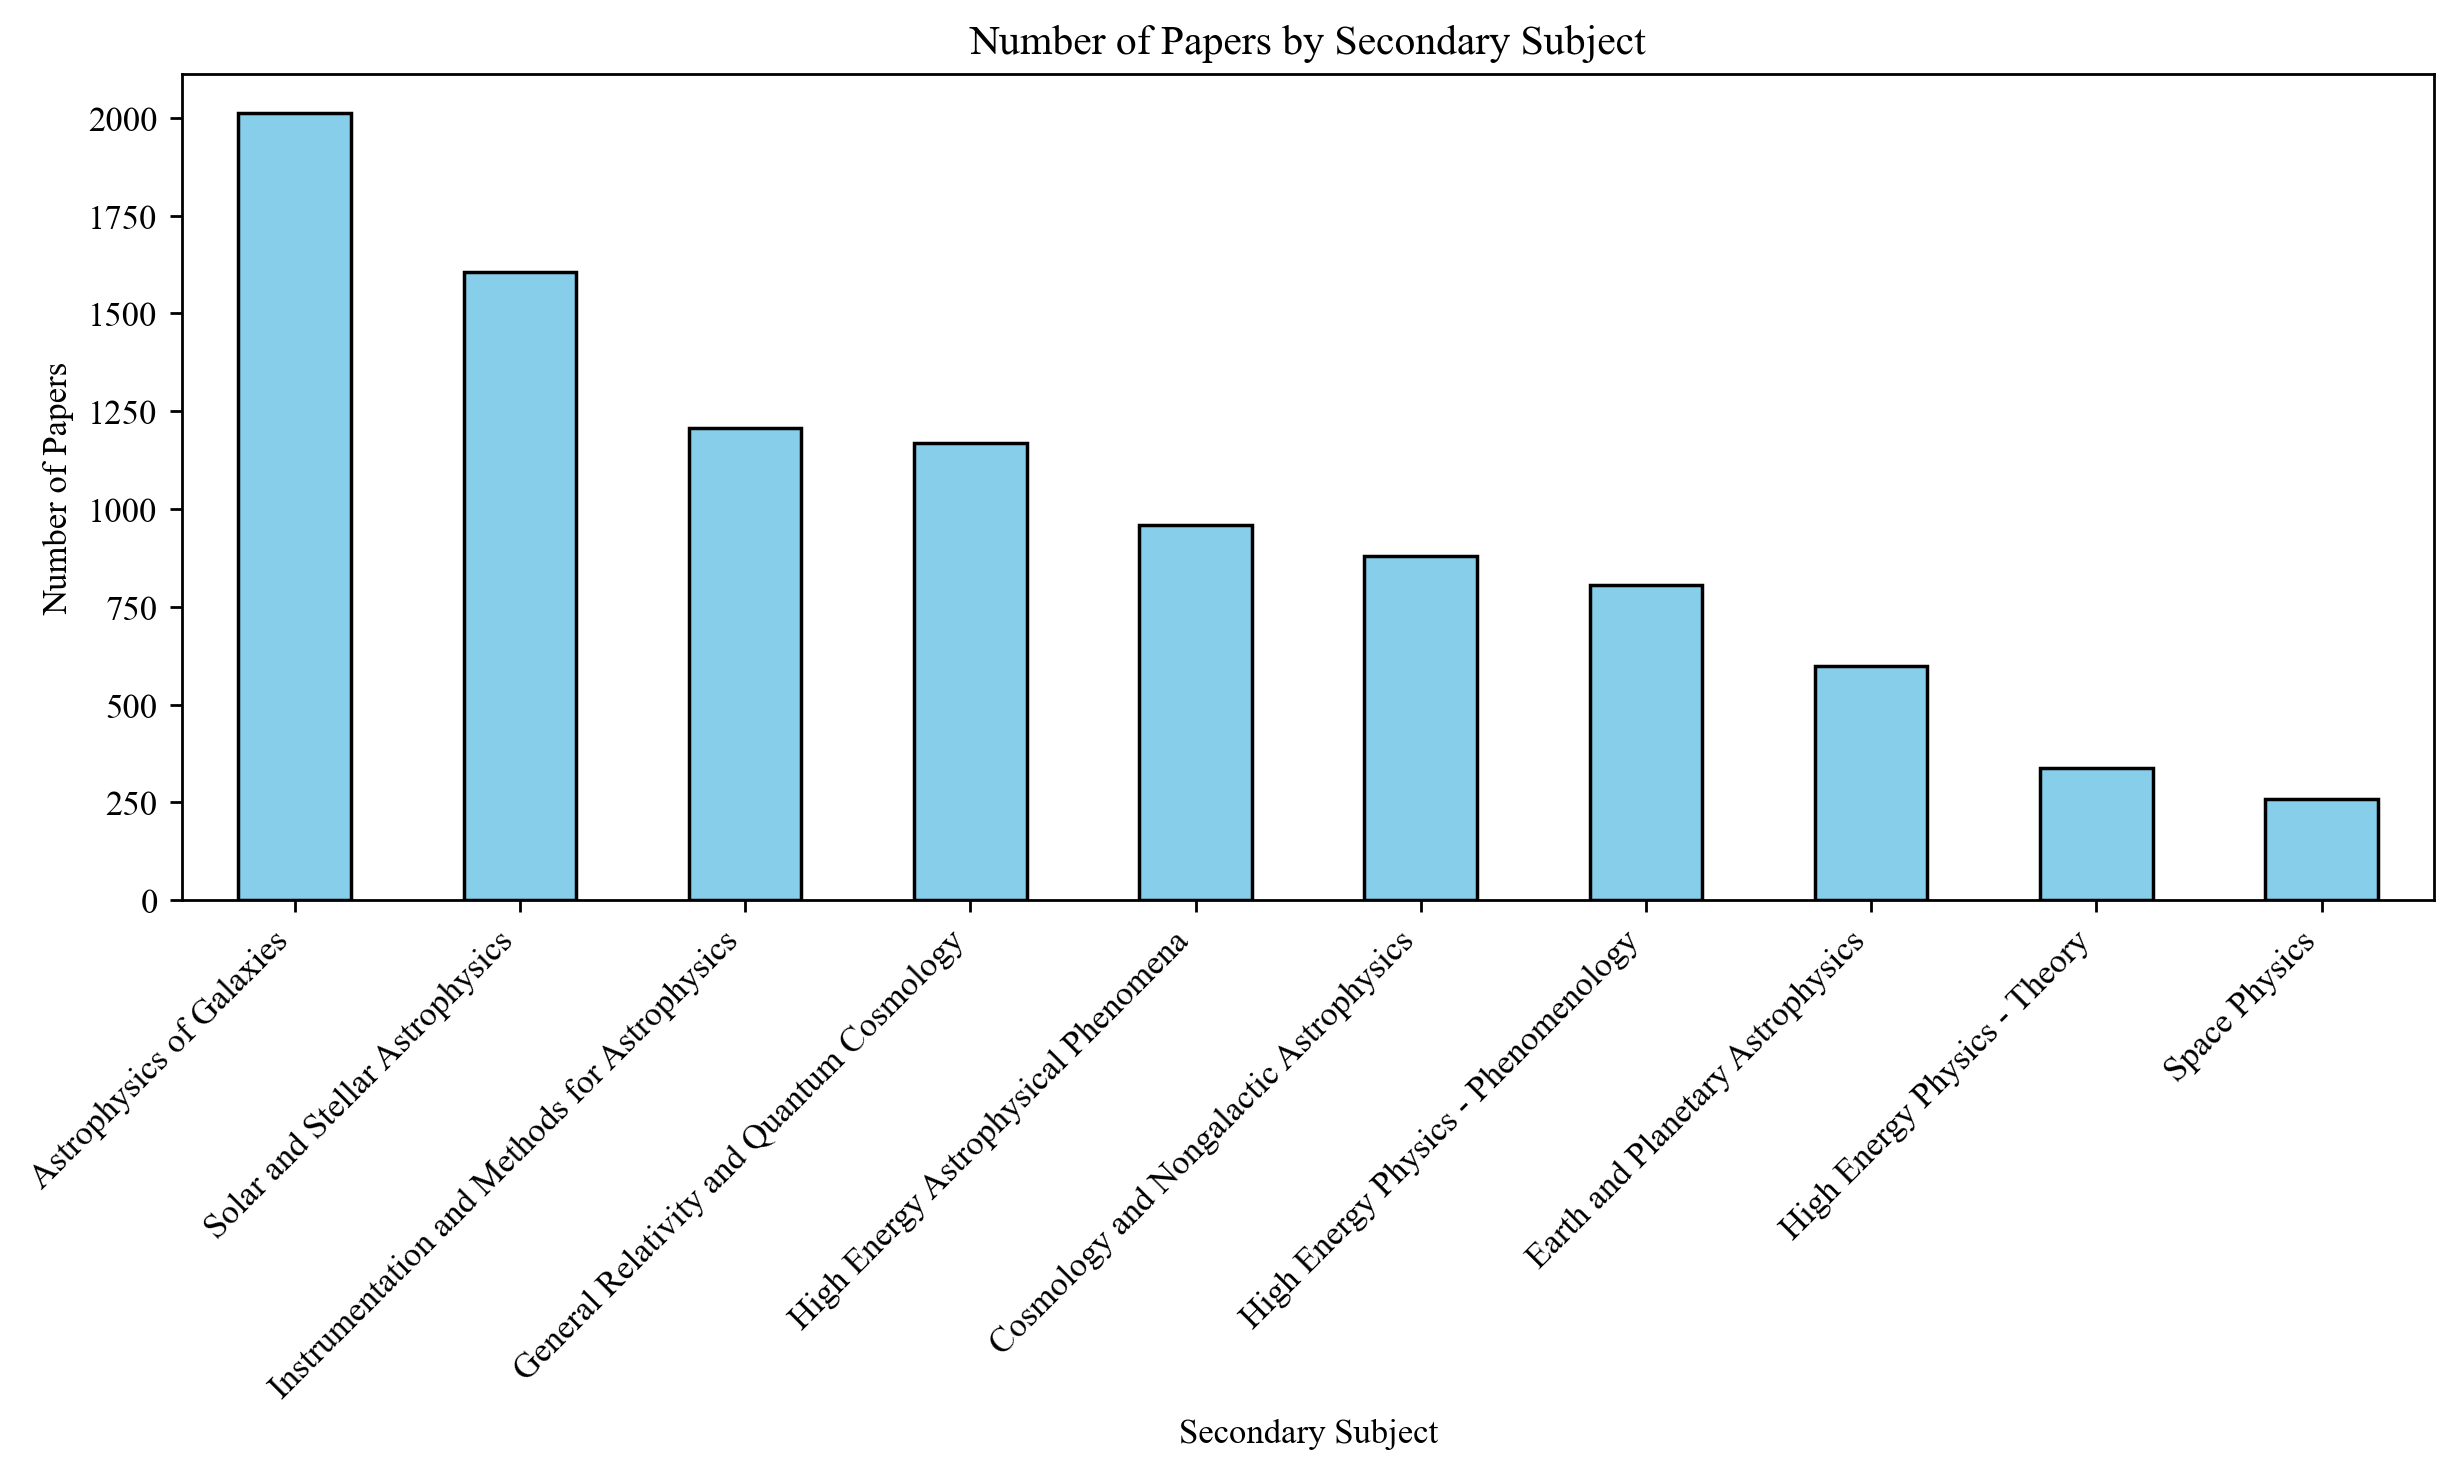

In [33]:
# Plot of the histogram of the top 10 secondary subjects
plt.figure(figsize=(10, 6))
secondary_subject_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Papers by Secondary Subject')
plt.xlabel('Secondary Subject')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

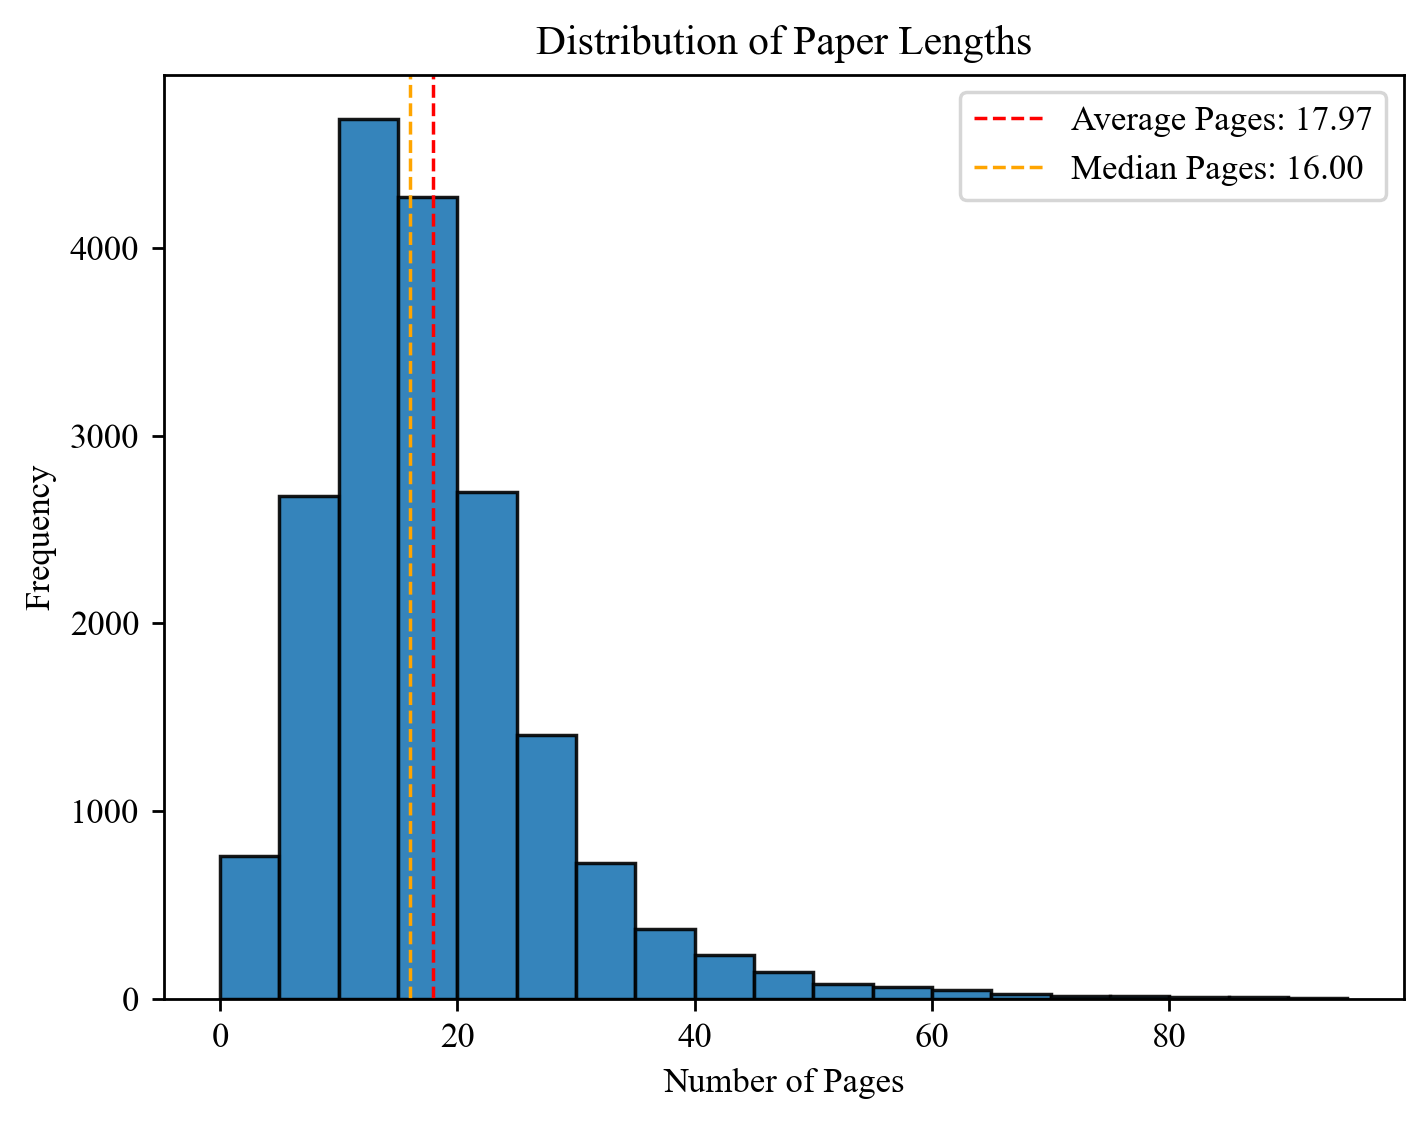

In [41]:
avg_pages = data['pages'].mean()
med_pages = data['pages'].median()

bins = np.arange(0, 100, 5)
plt.hist(data['pages'], bins=bins, edgecolor='black', alpha=0.9)
plt.axvline(avg_pages, color='red', linestyle='dashed', linewidth=1, label=f'Average Pages: {avg_pages:.2f}')
plt.axvline(med_pages, color='orange', linestyle='dashed', linewidth=1, label=f'Median Pages: {med_pages:.2f}')
plt.title('Distribution of Paper Lengths')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.legend()
plt.show()

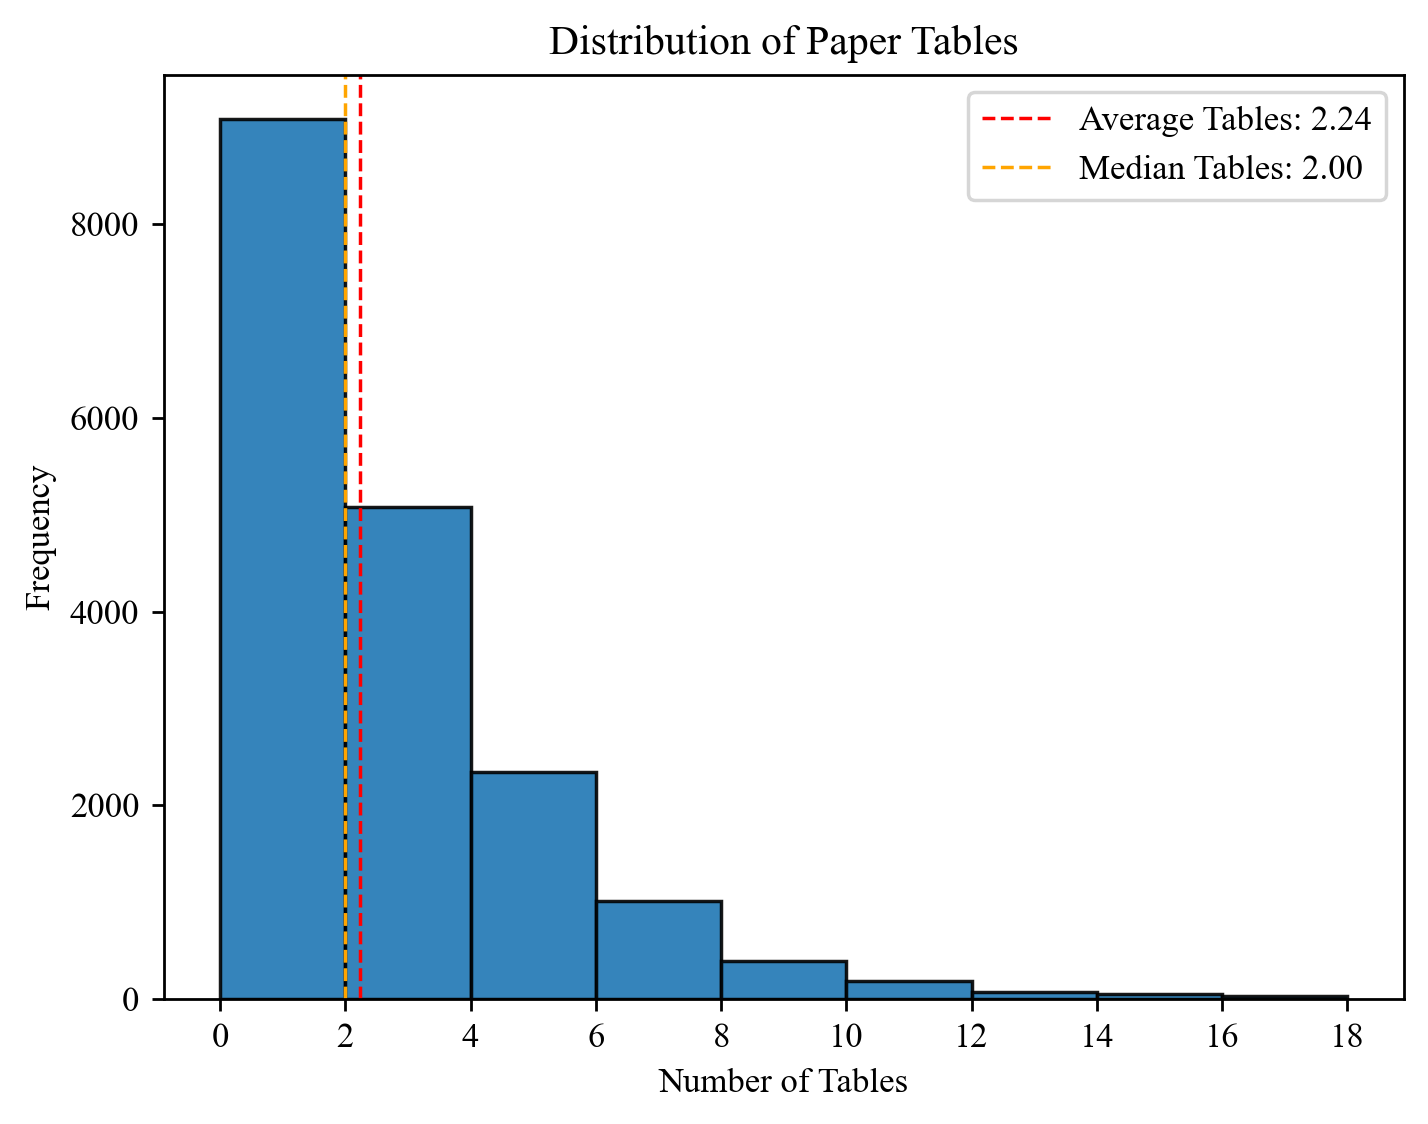

In [53]:
avg_tables = data['tables'].mean()
med_tables = data['tables'].median()

bins = np.arange(0, 20, 2)
plt.hist(data['tables'], bins=bins, edgecolor='black', alpha=0.9)
plt.axvline(avg_tables, color='red', linestyle='dashed', linewidth=1, label=f'Average Tables: {avg_tables:.2f}')
plt.axvline(med_tables, color='orange', linestyle='dashed', linewidth=1, label=f'Median Tables: {med_tables:.2f}')
plt.title('Distribution of Paper Tables')
plt.xlabel('Number of Tables')
plt.xticks(bins)
plt.ylabel('Frequency')
plt.legend()
plt.show()

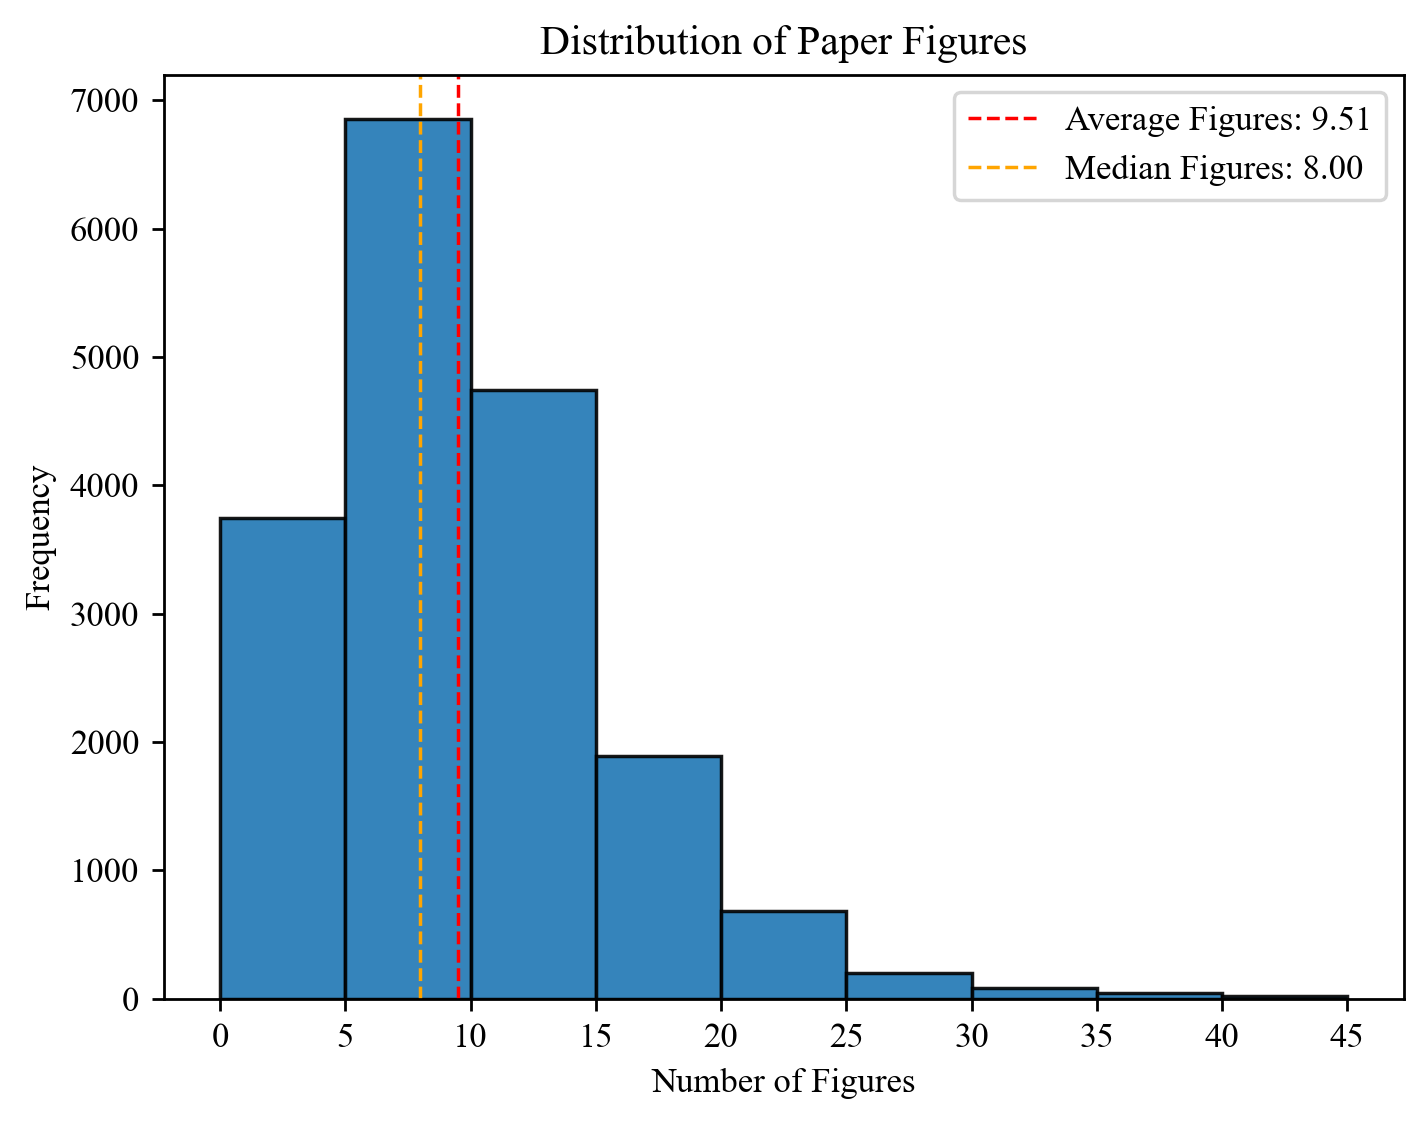

In [58]:
avg_figures = data['figures'].mean()
med_figures = data['figures'].median()

bins = np.arange(0, 50, 5)
plt.hist(data['figures'], bins=bins, edgecolor='black', alpha=0.9)
plt.axvline(avg_figures, color='red', linestyle='dashed', linewidth=1, label=f'Average Figures: {avg_figures:.2f}')
plt.axvline(med_figures, color='orange', linestyle='dashed', linewidth=1, label=f'Median Figures: {med_figures:.2f}')
plt.title('Distribution of Paper Figures')
plt.xlabel('Number of Figures')
plt.xticks(bins)
plt.ylabel('Frequency')
plt.legend()
plt.show()

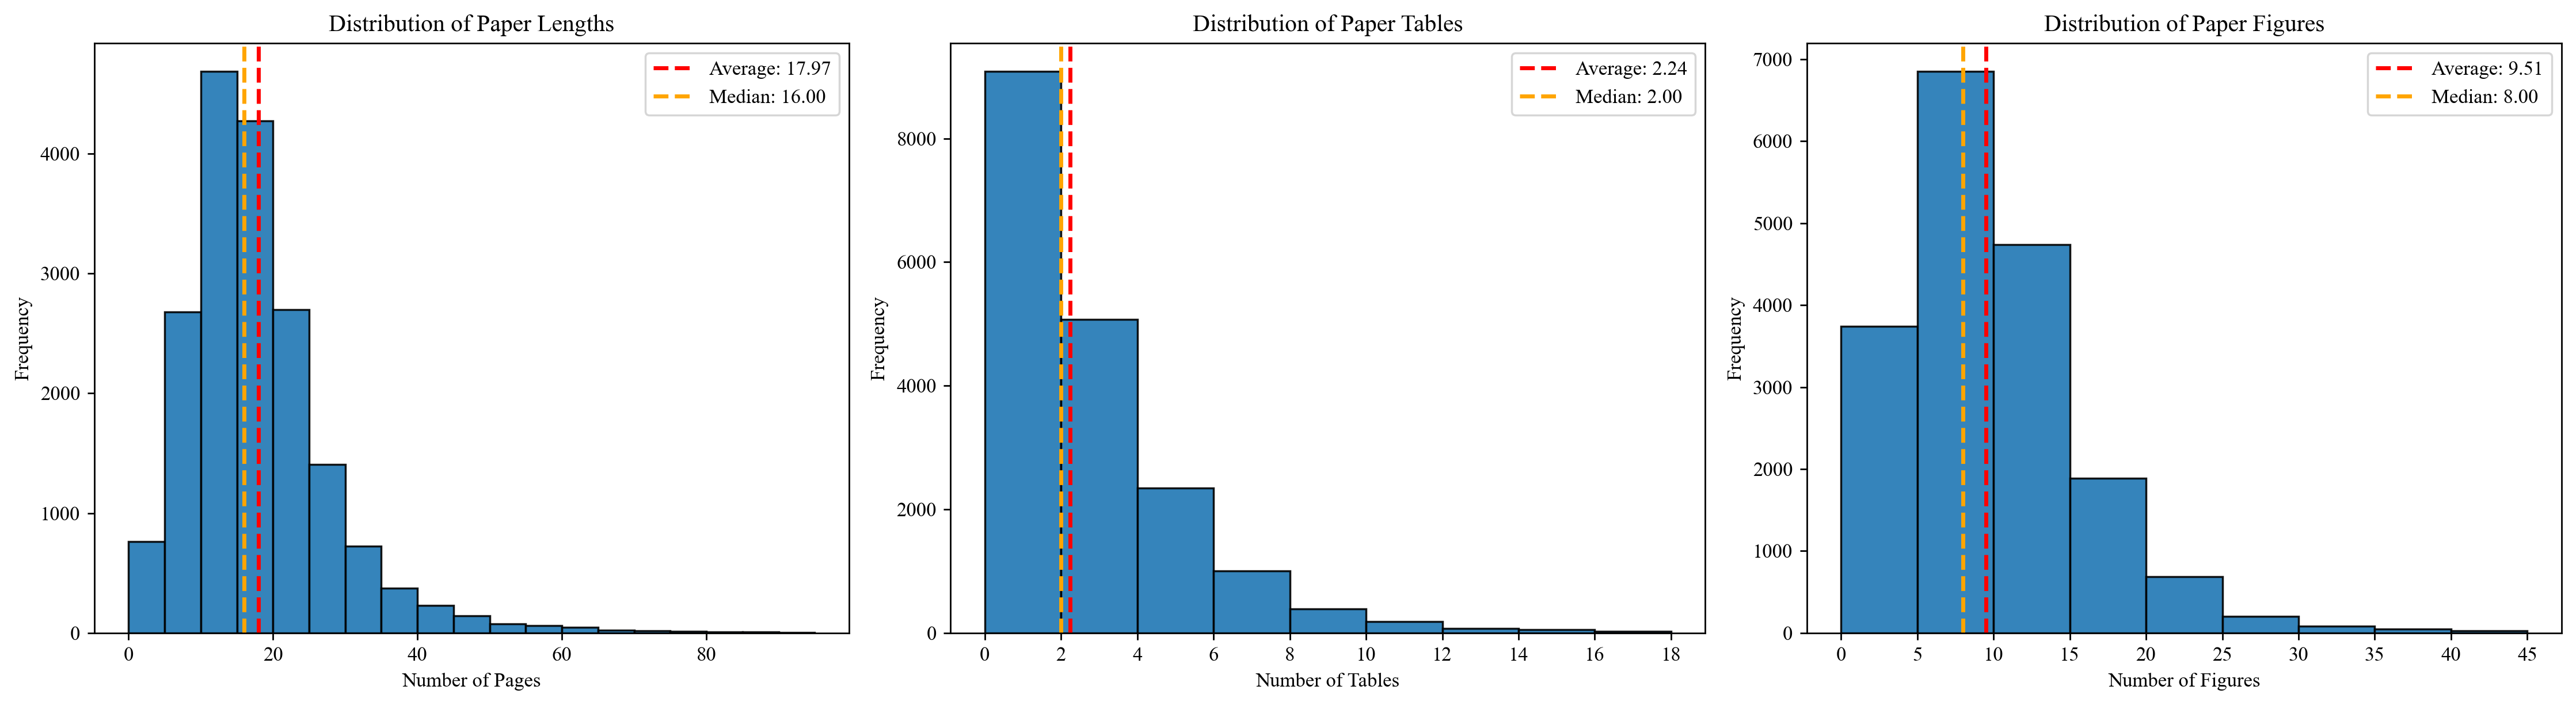

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Pages
avg_pages = data['pages'].mean()
med_pages = data['pages'].median()
bins_pages = np.arange(0, 100, 5)

axes[0].hist(data['pages'], bins=bins_pages, edgecolor='black', alpha=0.9)
axes[0].axvline(avg_pages, color='red', linestyle='dashed', linewidth=2, label=f'Average: {avg_pages:.2f}')
axes[0].axvline(med_pages, color='orange', linestyle='dashed', linewidth=2, label=f'Median: {med_pages:.2f}')
axes[0].set_title('Distribution of Paper Lengths')
axes[0].set_xlabel('Number of Pages')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot 2: Tables
avg_tables = data['tables'].mean()
med_tables = data['tables'].median()
bins_tables = np.arange(0, 20, 2)

axes[1].hist(data['tables'], bins=bins_tables, edgecolor='black', alpha=0.9)
axes[1].axvline(avg_tables, color='red', linestyle='dashed', linewidth=2, label=f'Average: {avg_tables:.2f}')
axes[1].axvline(med_tables, color='orange', linestyle='dashed', linewidth=2, label=f'Median: {med_tables:.2f}')
axes[1].set_title('Distribution of Paper Tables')
axes[1].set_xlabel('Number of Tables')
axes[1].set_xticks(bins_tables)
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot 3: Figures
avg_figures = data['figures'].mean()
med_figures = data['figures'].median()
bins_figures = np.arange(0, 50, 5)

axes[2].hist(data['figures'], bins=bins_figures, edgecolor='black', alpha=0.9)
axes[2].axvline(avg_figures, color='red', linestyle='dashed', linewidth=2, label=f'Average: {avg_figures:.2f}')
axes[2].axvline(med_figures, color='orange', linestyle='dashed', linewidth=2, label=f'Median: {med_figures:.2f}')
axes[2].set_title('Distribution of Paper Figures')
axes[2].set_xlabel('Number of Figures')
axes[2].set_xticks(bins_figures)
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()

In [5]:
data['tables'] = data['tables'].fillna(0)
data['pages'] = data['pages'].fillna(0)

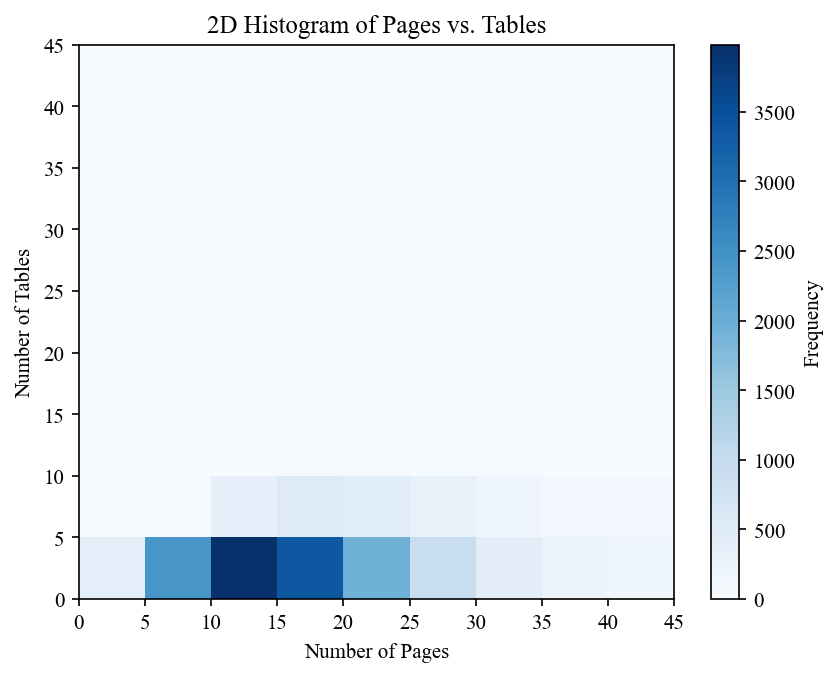

In [6]:
bins = np.arange(0, 50, 5)
plt.hist2d(data['pages'], data['tables'], bins=[bins, bins], cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('2D Histogram of Pages vs. Tables')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Tables')
plt.show()

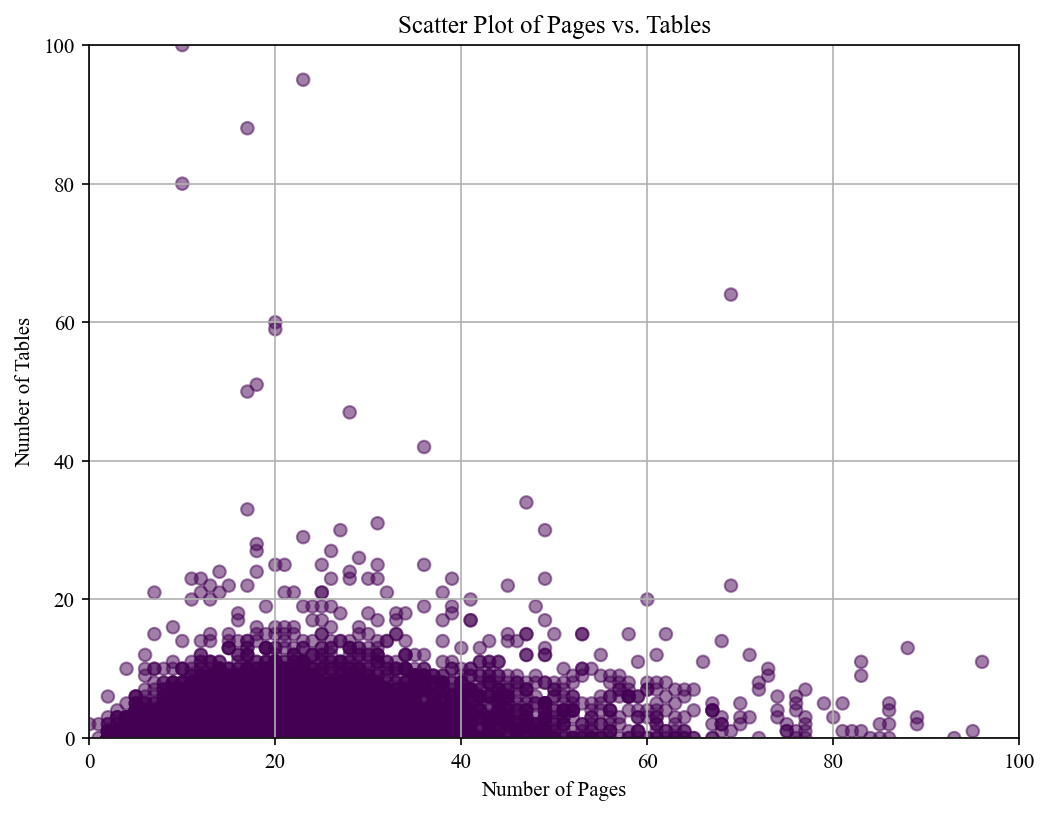

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(data['pages'], data['tables'], c=data['figures'], alpha=0.5, cmap='viridis')
plt.title('Scatter Plot of Pages vs. Tables')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Tables')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()